## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.1.3
numpy version: 1.19.2
seaborn version: 0.11.0
sklearn version: 0.23.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
# Tempolary data preparation and just use for build model 

In [5]:
df = df.drop(columns=['province', 'year'])

In [6]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.000000,39.000000,122.929870,1543.319740,74.789351,39.460260,14.781299,27.875455,1.358442,0.090000,1404.485714
std,1.416054,22.255032,30.138271,774.967638,4.380409,2.236733,3.899928,1.024079,2.354370,0.126734,1363.167218
min,1.000000,1.000000,75.000000,513.200000,63.900000,24.000000,0.600000,23.600000,0.000000,0.000000,62.000000
25%,2.000000,20.000000,101.000000,1023.500000,71.400000,37.900000,11.600000,27.300000,0.000000,0.000000,510.000000
50%,3.000000,39.000000,114.000000,1308.700000,74.300000,39.700000,14.800000,27.900000,1.000000,0.040000,938.000000
75%,4.000000,58.000000,141.000000,1794.900000,77.700000,41.200000,18.200000,28.600000,2.000000,0.140000,1821.000000
max,5.000000,77.000000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.300000,19.000000,0.880000,8279.000000


In [7]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [8]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [9]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
380,0.248276,0.094531,0.218009,0.855670,0.535088,0.402597,0.000000,0.000000
381,0.172414,0.147588,0.270142,0.953608,0.504386,0.480519,0.052632,0.045455
382,0.075862,0.120002,0.170616,0.979381,0.587719,0.636364,0.052632,0.193182
383,0.117241,0.060870,0.355450,0.953608,0.649123,0.694805,0.000000,0.000000
384,0.248276,0.226619,0.218009,0.855670,0.596491,0.493506,0.157895,0.159091


In [11]:
# log transform to target variable impove RMSE value.

#df['patient'] = np.log(df['patient'])

In [12]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [13]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [14]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,3.00,39.00,0.33,0.22,0.52,0.80,0.62,0.56,0.07,0.10,1404.49
std,1.42,22.26,0.21,0.16,0.21,0.12,0.17,0.13,0.12,0.14,1363.17
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00
25%,2.00,20.00,0.18,0.11,0.36,0.72,0.48,0.48,0.00,0.00,510.00
50%,3.00,39.00,0.27,0.17,0.49,0.81,0.62,0.56,0.05,0.05,938.00
75%,4.00,58.00,0.46,0.27,0.65,0.89,0.77,0.65,0.11,0.16,1821.00
max,5.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


## Features selection for Regression Model

In [15]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [16]:
X = df_pre[['year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',
       'temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc'
       ]]
y = df_pre['patient']

## Train Test Split

This step we will separate data to train (training set) and การ test (testing set)
* training set use for train model 
* testing set use for  test model or call that Evaluation 


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Train dataset 80% and Test dataset 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Import libraries for tuning hyperparameter

from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [21]:
# number of features in X_train
len(X_train.columns)

10

In [22]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = False, random_state = 80)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
# Optional
rfe = RFE(lm)   # Recursive Feature Elimination
#sfs = SFS(lm)   # Sequential Feature Selector

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=80, shuffle=False),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [23]:
model_cv.best_params_

{'n_features_to_select': 2}

In [24]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=2)

In [25]:
model_cv.best_score_

0.43713718025373155

In [26]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020536,0.006106,0.003468,0.006935,1,{'n_features_to_select': 1},0.050482,0.428281,0.453916,0.441032,...,0.277850,0.200379,10,0.409379,0.324357,0.325124,0.347459,0.398823,0.361029,0.036288
1,0.012053,0.006641,0.010384,0.016948,2,{'n_features_to_select': 2},0.230318,0.574209,0.523927,0.617101,...,0.437137,0.167507,1,0.548530,0.466222,0.494695,0.485778,0.535192,0.506083,0.030919
2,0.010131,0.004287,0.001750,0.002619,3,{'n_features_to_select': 3},0.233599,0.557440,0.522848,0.620083,...,0.435168,0.164211,2,0.549386,0.473470,0.494907,0.485840,0.536430,0.508007,0.029583
3,0.005440,0.006786,0.003324,0.006161,4,{'n_features_to_select': 4},0.081360,0.552626,0.520639,0.599383,...,0.399865,0.201524,7,0.566737,0.479655,0.497877,0.492529,0.538300,0.515020,0.032456
4,0.006461,0.007921,0.000000,0.000000,5,{'n_features_to_select': 5},0.066079,0.553289,0.517331,0.594158,...,0.394454,0.205651,9,0.571048,0.480730,0.498468,0.492971,0.539524,0.516548,0.033657
5,0.002611,0.003334,0.002006,0.003104,6,{'n_features_to_select': 6},0.062595,0.553166,0.516604,0.597319,...,0.395351,0.206452,8,0.571257,0.481946,0.498490,0.493084,0.540282,0.517012,0.033554
6,0.004034,0.003357,0.000817,0.001000,7,{'n_features_to_select': 7},0.095839,0.548694,0.497697,0.595087,...,0.402847,0.188327,6,0.572296,0.482434,0.519328,0.493246,0.551181,0.523697,0.033959
7,0.001111,0.001448,0.000855,0.001711,8,{'n_features_to_select': 8},0.098188,0.547176,0.499684,0.611627,...,0.406802,0.190939,3,0.572302,0.497931,0.519458,0.504406,0.551225,0.529064,0.028391
8,0.003963,0.001131,0.001727,0.000267,9,{'n_features_to_select': 9},0.091401,0.547506,0.501298,0.612073,...,0.405908,0.193451,4,0.573470,0.497939,0.519472,0.504413,0.551225,0.529304,0.028744
9,0.002331,0.003901,0.001904,0.003109,10,{'n_features_to_select': 10},0.091452,0.547687,0.494665,0.612664,...,0.404684,0.192994,5,0.573470,0.497945,0.521243,0.504420,0.551226,0.529661,0.028629


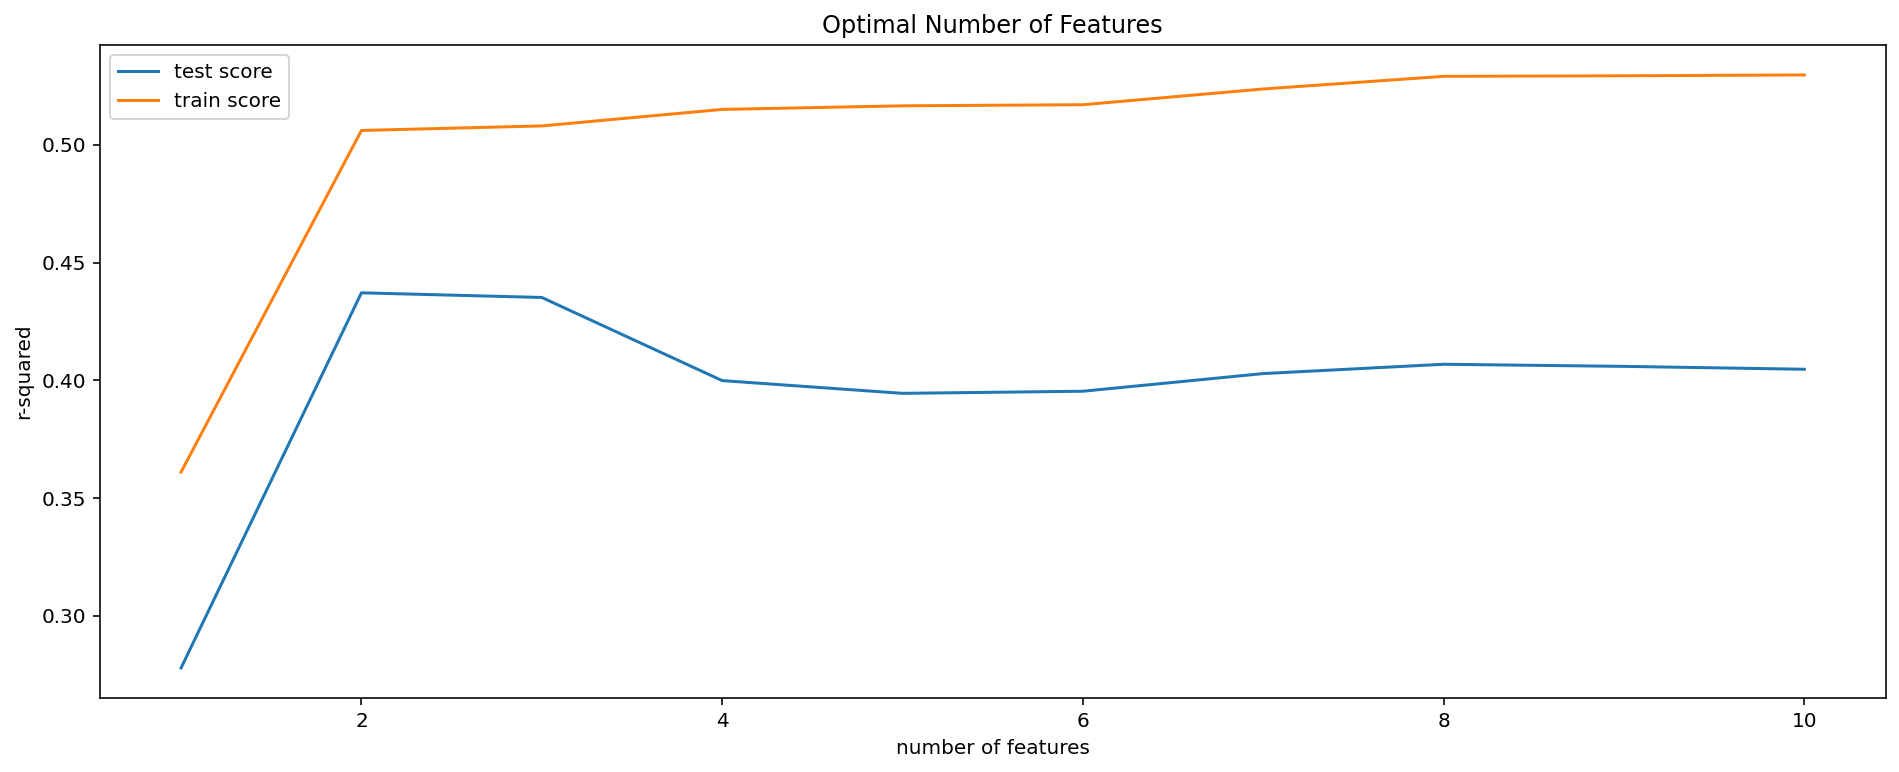

In [40]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])    #mean_test_score
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])   #mean_train_score
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

## Model Evaluation

evaluate model by visit coefficients of each item

In [28]:
r_sq = model_cv.score(X_train,y_train)
print('Coefficient of determination(R_squar_score):', r_sq)

Coefficient of determination(R_squar_score): 0.5066131065159912


## Predictions from our Model

In [29]:
# Predicting X test
predictions = model_cv.predict(X_test)

In [30]:
y_test.describe().round(2)

count      77.00
mean     1604.84
std      1617.69
min       179.00
25%       580.00
50%      1081.00
75%      1624.00
max      7314.00
Name: patient, dtype: float64

In [31]:
# predictions.describe().round(2)

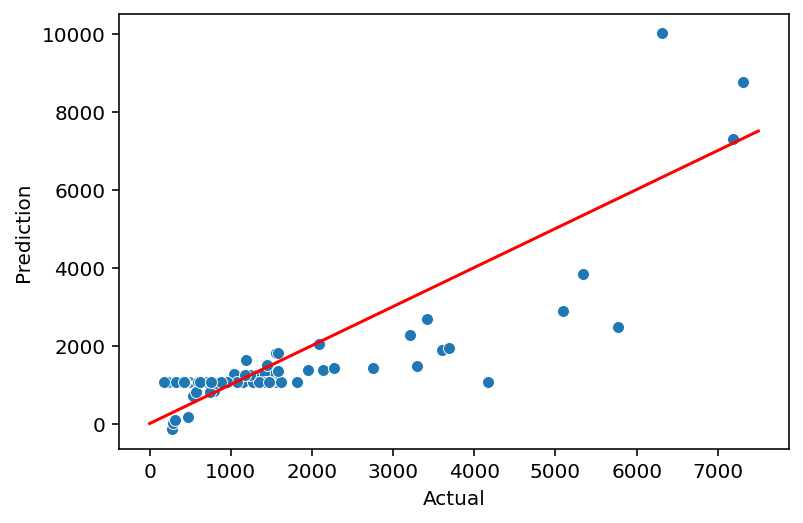

In [32]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

# Simulate linear line

## Prediction

In [33]:
# Choose one of sample to predict and see result

# input : X_test.loc[[random sample for prediction test]]
    
#y_pred = model_cv.predict(X_test.loc[[90]])

#plt.scatter(y_test.loc[[90]],  y_pred)
#print( "Actual Patient",float(y_test.loc[[90]] ) )
#print( "Predicted Patient", float( y_pred))

**Residual Histogram**

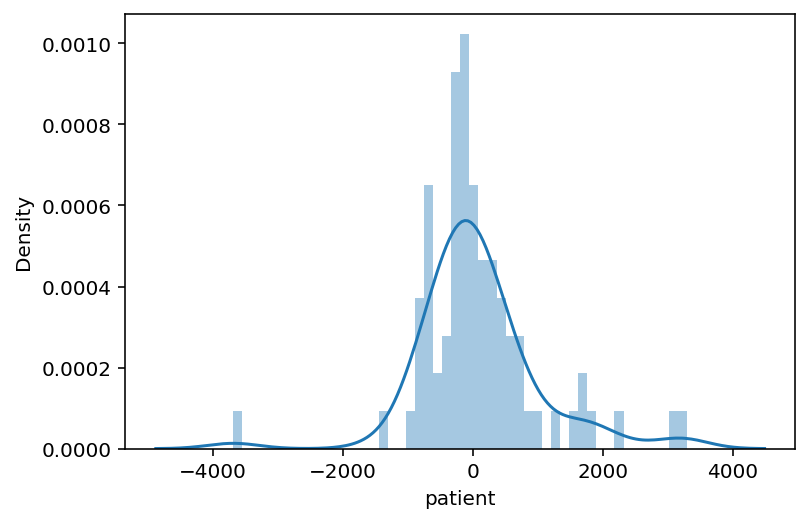

In [34]:
sns.distplot((y_test-predictions),bins=50);

### Actual value and the predicted value

In [35]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
35,837,1075.951300
329,3419,2685.170384
265,929,1075.951300
299,3600,1880.560842
190,1155,1075.951300
107,295,1075.951300
227,1542,1335.858730
134,7314,8746.937925
130,271,-135.580460
70,1557,1808.207810


## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(model_cv.score(X_train,y_train)*100))
print('R squared of Test Set: {:.2f}'.format(model_cv.score(X_test,y_test)*100))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 50.66
R squared of Test Set: 65.40
Mean Absolute Error (MAE): 613.4758
Root Mean Squared Error (RMSE): 945.3093
